# MLF Homework 1 

Simone Robba

# Overview

With this code is analysed a dataset related to the provision of credit to borrowes. 
It records whether a certain person experienced 90 days past due delinquency or worse, and a set of variables (predictors) related to each person.

The aim of the analysis is to test the capability of a set of models such as Linear regression (LR), Support Vector Machine (SVM), and Decision Tree (Tree) to predict the default of a borrower (measured with the variable "Person experienced 90 days past due delinquency or worse").

To this aim, first is implemented a linear regression model that elaborate the whole feature dataset, then the 2 most relevant features are selected, and the rest of the analysis is developed based on these 2 features.
Each model (LR, SVM, Tree) is then newly built different times varying the hyperparametes: C for LR and SVM, Max Depth for Tree), and its accuracy computed for both the train dataset and the test dataset.

The models with the best set of hyperparameters and parameters are finally selected and plotted in a chart.

# Setting Dataframes and Arrays

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
import matplotlib
from distutils.version import LooseVersion

In the following code the train feature matrix, train y matrix, test feature matrix and test y matrix are extracted from the related csv files.
Both the train and test feature matrix contain NaN values, which are substituted with the mean value of the whole feature vector. After that, the feature matrix are standardized.

The relevant numpy array produced are the following:
- X_train_std: Feature matrix of the train dataset, standardized.
- X_test_std: Feature matrix of the test dataset, standardized.
- y_train: Output matrix of the train dataset
- y_test_int: Output matrix of the test dataset, transformed in integers 0/1 on the base of the related probability values.

In [53]:
df = pd.read_csv('cs-training.csv', header= 0, index_col=0, encoding='utf-8')
Xy0_test = pd.read_csv('cs-test.csv', header= 0, index_col=0, encoding='utf-8')
y0_test = pd.read_csv('sampleEntry.csv', header= 0, index_col=0, encoding='utf-8')
y_test = y0_test.iloc[:, 0].values    #y_test
y_test_int = np.round(y_test)         
y_test_int = y_test_int.astype(int) #y_test_int
df2= df.fillna(df.mean())
Xy_test = Xy0_test.fillna(df.mean())
X_train, y_train = df2.iloc[:, 1:].values, df2.iloc[:, 0].values     #X_train   y_train
X_test=Xy_test.iloc[:, 1:].values     #X_test
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)   #X_train_std
X_test_std = sc.transform(X_test)         #X_test_std


The initial datasets contain NaN values:

In [54]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [55]:
Xy0_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

After those values are substituted with the mean values, the number of NaN value becomes 0

In [56]:
df2.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [57]:
Xy_test.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# Selecting the most relevant features

A first Logistic Regression is run without penality

In [58]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test_int))

Training accuracy: 0.9338733333333333
Test accuracy: 0.9843157345103101


With the following code, a chart is plotted showing the wheight coefficients of the LR, with penality L1, increasing the value of C.

- In the first chart the value of C varies from 10^(-5) to 10^(5)
- In the second the variation range of C is narrowed from 10^(-5) to 10^(-3)
- Since 3 weights remain, another LR is run with C=0.001. Still 3 weights remain.
- One more LR with C=0.0005 reduces the number of weights to 2

The selected features are therefore "Age" and "NumberOfTime30-59DaysPastDueNotWorse".

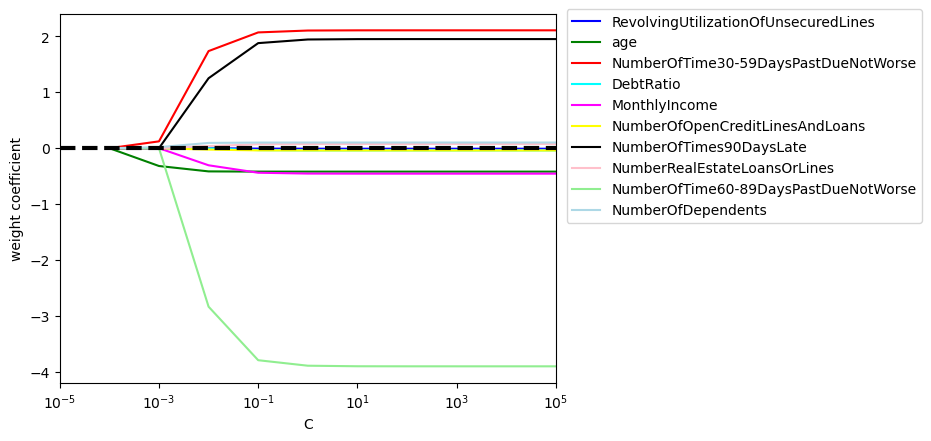

In [36]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df2.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

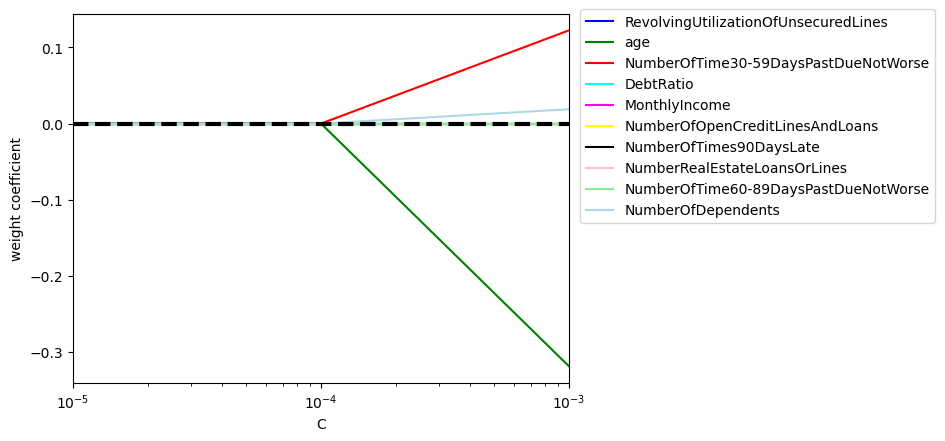

In [59]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-5., -2.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df2.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**-3])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [60]:
lr = LogisticRegression(penalty='l1', C=0.001, solver='liblinear', random_state=0)
lr.fit(X_train_std, y_train)
lr.coef_

array([[ 0.        , -0.31862011,  0.12240545,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.01881454]])

In [61]:
lr = LogisticRegression(penalty='l1', C=0.0005, solver='liblinear', random_state=0)
lr.fit(X_train_std, y_train)
print(lr.coef_)
print("Training accuracy (C= 0.0005):", lr.score(X_train_std, y_train))

[[ 0.         -0.20223301  0.09574347  0.          0.          0.
   0.          0.          0.          0.        ]]
Training accuracy (C= 0.0005): 0.9330933333333333


In [62]:
df2.iloc[:, 2:4]

,age,NumberOfTime30-59DaysPastDueNotWorse
1,45,2
2,40,0
3,38,1
4,30,0
5,49,1
...,...,...
149996,74,0
149997,44,0
149998,58,0
149999,30,0


The selected features are selected from the features matrix, then standardized.
The new relevant matrices are now:

- X_train_2f_std
- X_test_2f_std
- y_train
- y_test_int

In [63]:
X_train_2f = df2.iloc[:, 2:4].values
X_test_2f = Xy_test.iloc[:, 2:4].values

sc = StandardScaler()
X_train_2f_std = sc.fit_transform(X_train_2f)
X_test_2f_std = sc.transform(X_test_2f)

# Logistic Regression

3 different logistic regressions are implemented, each of them with a different hyperparameter. 
Penality is set by default as l2, C is set respectively as:
- C=0.001
- C=0.01
- C=100

The results are identical

In [73]:
lr = LogisticRegression(C=0.001, solver='liblinear', random_state=0)
lr.fit(X_train_2f_std, y_train)
print("Training accuracy (LR, 2 features, C=0.001):", lr.score(X_train_2f_std, y_train))
print("Test accuracy (LR, 2 features, C=0.001):", lr.score(X_test_2f_std, y_test_int))

Training accuracy (LR, 2 features, C=0.001): 0.9333266666666666
Test accuracy (LR, 2 features, C=0.001): 0.9836359516467493


In [74]:
lr = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
lr.fit(X_train_2f_std, y_train)
print("Training accuracy (LR, 2 features, C=0.01):", lr.score(X_train_2f_std, y_train))
print("Test accuracy (LR, 2 features, C=0.01):", lr.score(X_test_2f_std, y_test_int))

Training accuracy (LR, 2 features, C=0.01): 0.9333266666666666
Test accuracy (LR, 2 features, C=0.01): 0.9836359516467493


In [94]:
lr = LogisticRegression(C=100, solver='liblinear', random_state=0)
lr.fit(X_train_2f_std, y_train)
print("Training accuracy (LR, 2 features, C=100):", lr.score(X_train_2f_std, y_train))
print("Test accuracy (LR, 2 features, C=100):", lr.score(X_test_2f_std, y_test_int))

Training accuracy (LR, 2 features, C=100): 0.9333266666666666
Test accuracy (LR, 2 features, C=100): 0.9836359516467493


# SVM

3 SMV models are run, the first is a linear SVM, the following two are Kernel SVM (rbf). The hyperparameters are respectively:
- C=1.0
- gamma=0.10, C=10.0
- gamma=0.50, C=5.0

In [76]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_2f_std, y_train)
print("Training accuracy (SVM, 2 features):", svm.score(X_train_2f_std, y_train))
print("Test accuracy (SVM, 2 features):", svm.score(X_test_2f_std, y_test_int))

Training accuracy (SVM, 2 features): 0.93316
Test accuracy (SVM, 2 features): 0.98320246692216


In [78]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_train_2f_std, y_train)
print("Training accuracy (Kernel SVM, 2 features, gamma=0.10, C=10.0):", svm.score(X_train_2f_std, y_train))
print("Test accuracy (Kernel SVM, 2 features, gamma=0.10, C=10.0):", svm.score(X_test_2f_std, y_test_int))

Training accuracy (Kernel SVM, 2 features, gamma=0.10, C=10.0): 0.9334466666666666
Test accuracy (Kernel SVM, 2 features, gamma=0.10, C=10.0): 0.9842369191058392


In [79]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.50, C=5.0)
svm.fit(X_train_2f_std, y_train)
print("Training accuracy (Kernel SVM, 2 features, gamma=0.50, C=5.0):", svm.score(X_train_2f_std, y_train))
print("Test accuracy (Kernel SVM, 2 features, gamma=0.50, C=5.0):", svm.score(X_test_2f_std, y_test_int))

Training accuracy (Kernel SVM, 2 features, gamma=0.50, C=5.0): 0.9335133333333333
Test accuracy (Kernel SVM, 2 features, gamma=0.50, C=5.0): 0.9844044018403397


# Tree

3 Tree models are run, varying the hyperparameter "max depth" respectively as:
- max_depth=4
- max_depth=2
- max_depth=6

In [80]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train_2f_std, y_train)
print('Training accuracy (Tree model, 2 features, max_depth=4):', tree_model.score(X_train_2f_std, y_train))
print('Training accuracy (Tree model, 2 features, max_depth=4):', tree_model.score(X_test_2f_std, y_test_int))

Training accuracy (Tree model, 2 features, max_depth=4): 0.93316
Training accuracy (Tree model, 2 features, max_depth=4): 0.98320246692216


In [81]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=2, 
                                    random_state=1)
tree_model.fit(X_train_2f_std, y_train)
print('Training accuracy (Tree model, 2 features, max_depth=2):', tree_model.score(X_train_2f_std, y_train))
print('Training accuracy (Tree model, 2 features, max_depth=2):', tree_model.score(X_test_2f_std, y_test_int))

Training accuracy (Tree model, 2 features, max_depth=2): 0.93316
Training accuracy (Tree model, 2 features, max_depth=2): 0.98320246692216


In [82]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=6, 
                                    random_state=1)
tree_model.fit(X_train_2f_std, y_train)
print('Training accuracy (Tree model, 2 features, max_depth=6):', tree_model.score(X_train_2f_std, y_train))
print('Training accuracy (Tree model, 2 features, max_depth=6):', tree_model.score(X_test_2f_std, y_test_int))

Training accuracy (Tree model, 2 features, max_depth=6): 0.93356
Training accuracy (Tree model, 2 features, max_depth=6): 0.9839512132646325


# Plot decision region

Once the different models have been tested and the best hyperparameters selected among the ones proposed, is time to plot the chart, for each model, showing the prediction regions in relation with the two selected features.

In [83]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

In [84]:
X_combined_std = np.vstack((X_train_2f_std, X_test_2f_std))
y_combined = np.hstack((y_train, y_test_int))

In [88]:
print(X_train_2f_std.shape)
print(X_test_2f_std.shape)
print(y_train.shape)
print(y_test.shape)
print(X_combined_std.shape)
print(y_combined.shape)

(150000, 2)
(101503, 2)
(150000,)
(101503,)
(251503, 2)
(251503,)


C:\Users\Simone\AppData\Local\Temp\ipykernel_14264\3939816904.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\Simone\AppData\Local\Temp\ipykernel_14264\3939816904.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


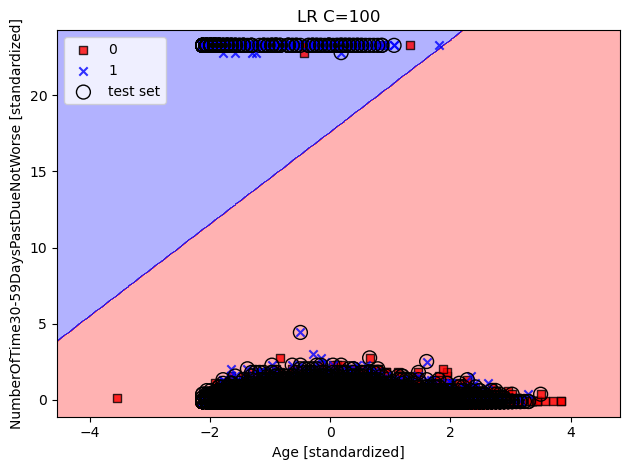

In [95]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(150001, 251503))
plt.xlabel('Age [standardized]')                                                            
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')                                                     
plt.legend(loc='upper left')
plt.title('LR C=100')
plt.tight_layout()
plt.show()

C:\Users\Simone\AppData\Local\Temp\ipykernel_14264\3939816904.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\Simone\AppData\Local\Temp\ipykernel_14264\3939816904.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


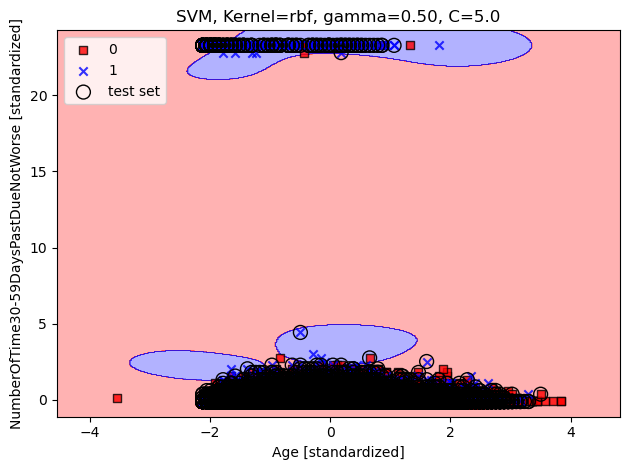

In [96]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(150001, 251503))
plt.xlabel('Age [standardized]')                                                            
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')                                                     
plt.legend(loc='upper left')
plt.title('SVM, Kernel=rbf, gamma=0.50, C=5.0')
plt.tight_layout()
plt.show()

C:\Users\Simone\AppData\Local\Temp\ipykernel_14264\3939816904.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\Simone\AppData\Local\Temp\ipykernel_14264\3939816904.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


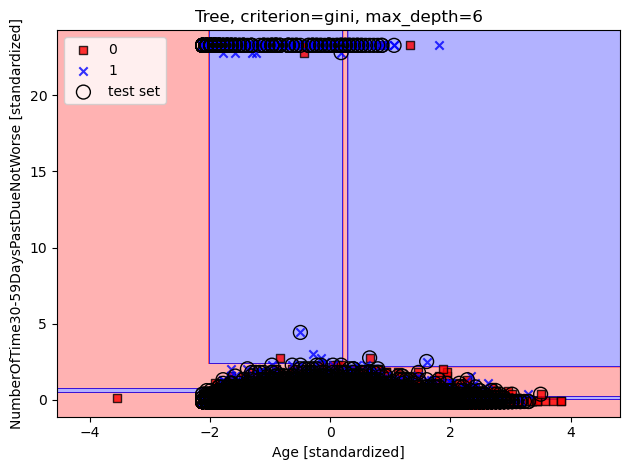

In [97]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=tree_model, test_idx=range(150001, 251503))
plt.xlabel('Age [standardized]')                                                            
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')                                                     
plt.legend(loc='upper left')
plt.title('Tree, criterion=gini, max_depth=6')
plt.tight_layout()
plt.show()